## Loading the Dataset

In [18]:
import pandas as pd

# Construct the file path based on your screenshot
# You may need to adjust the .csv filename if it's different
file_path = '/kaggle/input/python-functions-with-docstrings/python_functions_and_documentation_dataset.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first 5 rows of the DataFrame
print(df.head())

                        repo                              path  \
0  ageitgey/face_recognition  examples/face_recognition_knn.py   
1  ageitgey/face_recognition  examples/face_recognition_knn.py   
2  ageitgey/face_recognition  examples/face_recognition_knn.py   
3  ageitgey/face_recognition           face_recognition/api.py   
4  ageitgey/face_recognition           face_recognition/api.py   

                         func_name  \
0                            train   
1                          predict   
2  show_prediction_labels_on_image   
3                     _rect_to_css   
4              _trim_css_to_bounds   

                                     original_string language  \
0  def train(train_dir, model_save_path=None, n_n...   python   
1  def predict(X_img_path, knn_clf=None, model_pa...   python   
2  def show_prediction_labels_on_image(img_path, ...   python   
3  def _rect_to_css(rect):\n    """\n    Convert ...   python   
4  def _trim_css_to_bounds(css, image_shape):\n  

## Data Visulization Part:

In [7]:
# Check shape, columns, and missing values
print("Shape of dataset:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nMissing values per column:")
print(df.isnull().sum())

# Quick info summary
print("\nData Types:")
print(df.dtypes)

# Unique counts for categorical columns
print("\nUnique counts in categorical columns:")
print(df.nunique())


Shape of dataset: (455243, 13)

Column Names: ['repo', 'path', 'func_name', 'original_string', 'language', 'code', 'code_tokens', 'docstring', 'docstring_tokens', 'sha', 'url', 'partition', 'summary']

Missing values per column:
repo                0
path                0
func_name           2
original_string     0
language            0
code                0
code_tokens         0
docstring           0
docstring_tokens    0
sha                 0
url                 0
partition           0
summary             0
dtype: int64

Data Types:
repo                object
path                object
func_name           object
original_string     object
language            object
code                object
code_tokens         object
docstring           object
docstring_tokens    object
sha                 object
url                 object
partition           object
summary             object
dtype: object

Unique counts in categorical columns:
repo                 13581
path                 92212
f

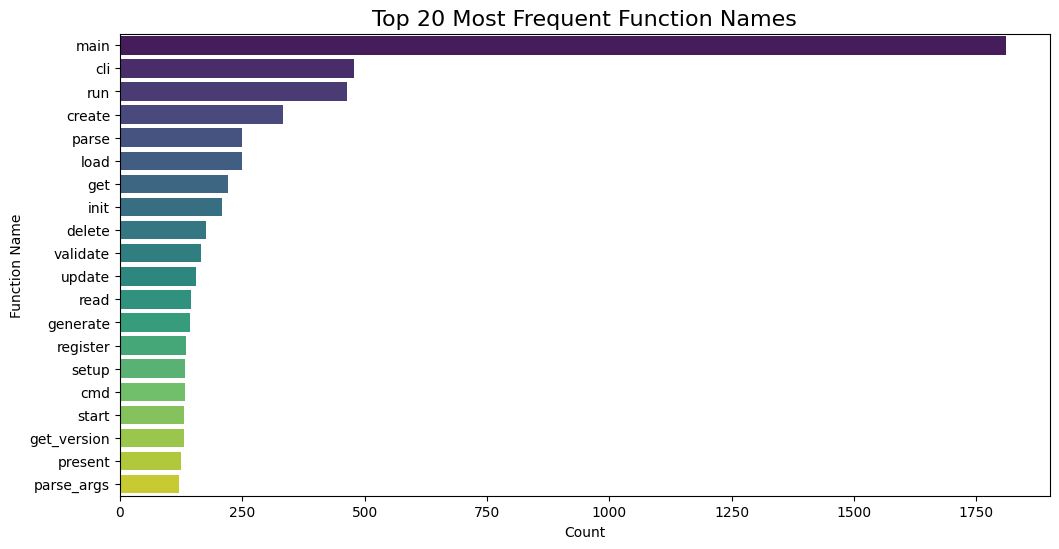

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
top_funcs = df['func_name'].value_counts().head(20)
sns.barplot(x=top_funcs.values, y=top_funcs.index, palette="viridis")

plt.title("Top 20 Most Frequent Function Names", fontsize=16)
plt.xlabel("Count")
plt.ylabel("Function Name")
plt.show()


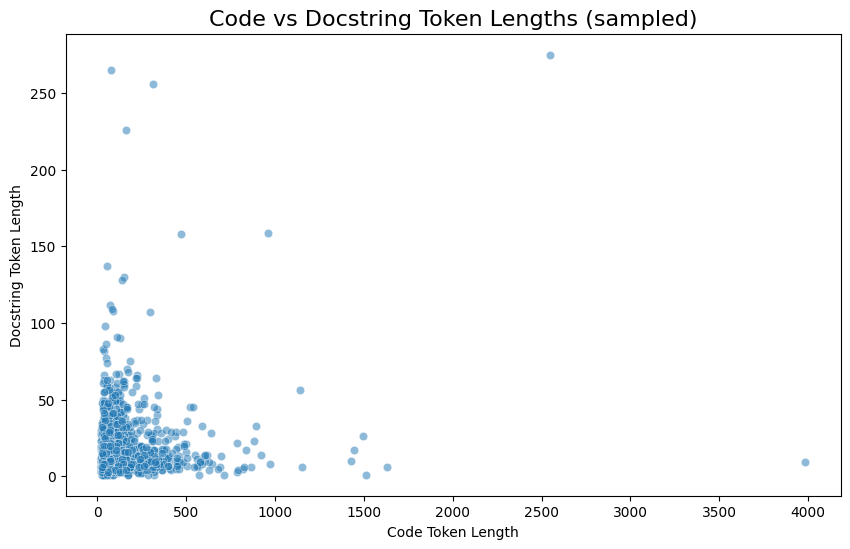

In [9]:
df['code_token_length'] = df['code_tokens'].apply(lambda x: len(eval(x)) if isinstance(x, str) else 0)
df['doc_token_length'] = df['docstring_tokens'].apply(lambda x: len(eval(x)) if isinstance(x, str) else 0)

plt.figure(figsize=(10,6))
sns.scatterplot(data=df.sample(2000), x="code_token_length", y="doc_token_length", alpha=0.5)
plt.title("Code vs Docstring Token Lengths (sampled)", fontsize=16)
plt.xlabel("Code Token Length")
plt.ylabel("Docstring Token Length")
plt.show()


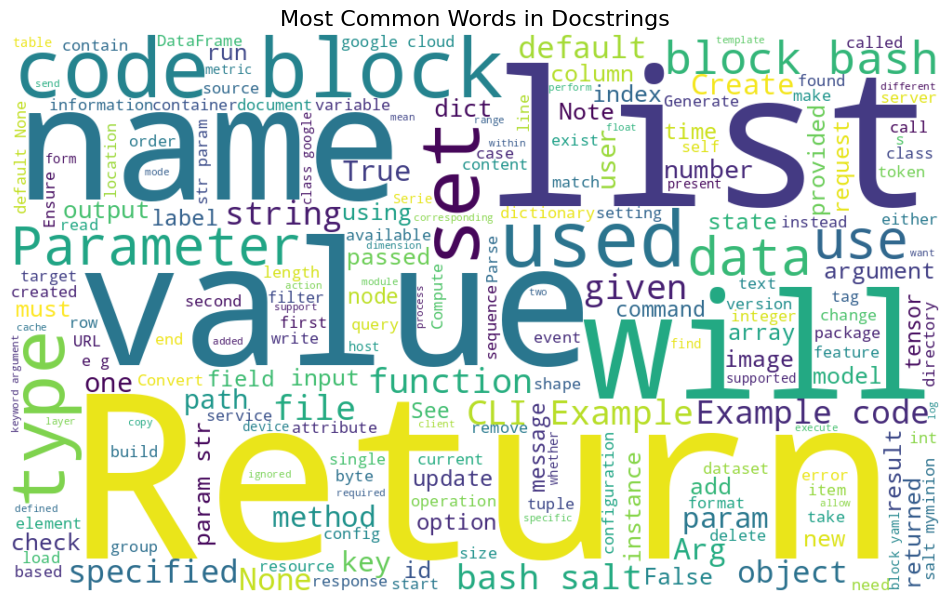

In [10]:
from wordcloud import WordCloud

text = " ".join(df['docstring'].dropna().astype(str).tolist()[:50000])  # sample for performance
wordcloud = WordCloud(width=1000, height=600, background_color="white").generate(text)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Docstrings", fontsize=16)
plt.show()


In [19]:
# Create new columns for character lengths
df['code_length'] = df['code'].astype(str).apply(len)
df['docstring_length'] = df['docstring'].astype(str).apply(len)
df['summary_length'] = df['summary'].astype(str).apply(len)
# Store the original number of rows
original_rows = len(df)
print(f"Original dataset shape: {df.shape}")

Original dataset shape: (455243, 16)


In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['docstring_length'])
plt.title("Outliers in Docstring Length", fontsize=16)
plt.xlabel("Docstring Length")
plt.show()


In [ ]:
df['summary_length'] = df['summary'].astype(str).apply(len)

plt.figure(figsize=(10,6))
sns.scatterplot(data=df.sample(2000), x="docstring_length", y="summary_length", alpha=0.5, color="purple")
plt.title("Docstring Length vs Summary Length", fontsize=16)
plt.xlabel("Docstring Length")
plt.ylabel("Summary Length")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Distribution of Character Lengths', fontsize=18)

# Plot for Code Length
sns.histplot(ax=axes[0], data=df, x='code_length', bins=50, kde=True, color='skyblue')
axes[0].set_title('Code Character Length')
axes[0].set_xlabel('Code Length (characters)')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(0, 4000) # Limiting x-axis for better visibility

# Plot for Docstring Length
sns.histplot(ax=axes[1], data=df, x='docstring_length', bins=50, kde=True, color='salmon')
axes[1].set_title('Docstring Character Length')
axes[1].set_xlabel('Docstring Length (characters)')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(0, 2000) # Limiting x-axis for better visibility

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='partition', palette='rocket')
plt.title('Data Partition Distribution', fontsize=16)
plt.xlabel('Partition')
plt.ylabel('Count')
plt.show()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Using a sample of the data for performance
code_text = " ".join(df['code'].dropna().astype(str).tolist()[:50000])

wordcloud = WordCloud(width=1000, height=600, background_color="black", colormap='viridis').generate(code_text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Source Code", fontsize=16)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Using a sample of the data for performance
sample_docstrings = df['docstring'].dropna().astype(str).sample(50000, random_state=42)

# Get top 20 bigrams
vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(sample_docstrings)
bag_of_words = vec.transform(sample_docstrings)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
top_bigrams = pd.DataFrame(words_freq[:20], columns=['Bigram', 'Frequency'])

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Bigram', data=top_bigrams, palette='coolwarm')
plt.title('Top 20 Most Frequent Bigrams in Docstrings', fontsize=16)
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the numerical length columns for the correlation matrix
length_features = ['code_length', 'docstring_length', 'code_token_length', 'doc_token_length', 'summary_length']
corr_matrix = df[length_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Heatmap of Length Features', fontsize=16)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Token Length Distribution by Partition', fontsize=18)

# Box plot for Code Token Length
sns.boxplot(ax=axes[0], data=df, x='partition', y='code_token_length', palette='Set2')
axes[0].set_title('Code Token Length by Partition')
axes[0].set_xlabel('Partition')
axes[0].set_ylabel('Code Token Length')
axes[0].set_ylim(0, 500) # Adjust limit to zoom in on the main distribution

# Box plot for Docstring Token Length
sns.boxplot(ax=axes[1], data=df, x='partition', y='doc_token_length', palette='Set3')
axes[1].set_title('Docstring Token Length by Partition')
axes[1].set_xlabel('Partition')
axes[1].set_ylabel('Docstring Token Length')
axes[1].set_ylim(0, 250) # Adjust limit to zoom in on the main distribution

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
top_repos = df['repo'].value_counts().head(20)
sns.barplot(x=top_repos.values, y=top_repos.index, palette='plasma')

plt.title('Top 20 Repositories by Number of Functions', fontsize=16)
plt.xlabel('Number of Functions')
plt.ylabel('Repository')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract prefixes (text before the first underscore)
# We only consider function names that contain an underscore
prefixes = df['func_name'].dropna()
prefixes = prefixes[prefixes.str.contains('_')].apply(lambda x: x.split('_')[0] + '_')
# A common case is functions starting with '_', so let's handle that specifically
prefixes = prefixes.replace({'_': '_ (private/internal)'})


plt.figure(figsize=(12, 8))
top_prefixes = prefixes.value_counts().head(20)
sns.barplot(x=top_prefixes.values, y=top_prefixes.index, palette='cividis')

plt.title('Top 20 Common Function Name Prefixes', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Prefix')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for function names that start and end with '__'
dunder_methods = df['func_name'].dropna()
dunder_methods = dunder_methods[dunder_methods.str.startswith('__') & dunder_methods.str.endswith('__')]

# --- SOLUTION: ADD THIS CHECK ---
# First, check if the filtered DataFrame is empty
if not dunder_methods.empty:
    plt.figure(figsize=(12, 8))
    top_dunders = dunder_methods.value_counts().head(15)
    sns.barplot(x=top_dunders.values, y=top_dunders.index, palette='cubehelix')

    plt.title('Frequency of Top 15 Special "Dunder" Methods', fontsize=16)
    plt.xlabel('Count')
    plt.ylabel('Dunder Method')
    plt.show()
else:
    # If it's empty, print a message instead of trying to plot
    print("No 'dunder' methods (e.g., __init__) were found in the 'func_name' column.")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the ratio, adding 1 to the denominator to avoid division by zero
df['doc_code_ratio'] = df['docstring_length'] / (df['code_length'] + 1)

plt.figure(figsize=(12, 7))
# We use a log scale on the y-axis to see the distribution more clearly
# We also filter out extreme ratios for better visualization
sns.histplot(df[(df['doc_code_ratio'] > 0) & (df['doc_code_ratio'] < 5)]['doc_code_ratio'],
             bins=50, kde=True, log_scale=(False, True))

plt.title('Distribution of Docstring-to-Code Character Length Ratio', fontsize=16)
plt.xlabel('Docstring Length / Code Length')
plt.ylabel('Frequency (Log Scale)')
plt.show()




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the owner/organization from the 'repo' column
# This part is correct: it takes everything before the '/'
df['repo_owner'] = df['repo'].apply(lambda x: x.split('/')[0])

plt.figure(figsize=(12, 8))
top_owners = df['repo_owner'].value_counts().head(20)
sns.barplot(x=top_owners.values, y=top_owners.index, palette='magma')

# The main change is in the title and labels for clarity
plt.title('Top 20 Contributing Organizations/Users by Function Count', fontsize=16)
plt.xlabel('Number of Functions')
plt.ylabel('Organization / User')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a smaller sample for performance, as jointplots can be slow
df_sample = df.sample(5000, random_state=42)

# Create the joint plot
g = sns.jointplot(
    data=df_sample,
    x="code_token_length",
    y="doc_token_length",
    kind="scatter",
    alpha=0.3,
    height=10,
    marginal_kws=dict(bins=50, fill=True)
)

g.fig.suptitle("Code vs Docstring Token Lengths (Joint Distribution Plot)", y=1.01, fontsize=16)
g.set_axis_labels("Code Token Length", "Docstring Token Length", fontsize=12)

# Set limits to zoom in on the densest area
plt.xlim(0, 750)
plt.ylim(0, 400)
plt.show()

## Data Cleaning

In [20]:
# --- STEP 1: Handle Missing Values ---
df.dropna(subset=['func_name'], inplace=True)

print(f"Rows removed: {original_rows - len(df)}")
print(f"Current dataset shape: {df.shape}")


Rows removed: 2
Current dataset shape: (455241, 16)


In [ ]:
# --- STEP 2: Remove Duplicates ---
rows_before_deduplication = len(df)
df.drop_duplicates(subset=['code', 'docstring', 'summary'], inplace=True)

print(f"Rows removed: {rows_before_deduplication - len(df)}")
print(f"Current dataset shape: {df.shape}")

In [21]:
# --- STEP 3: Remove Length-based Outliers ---
rows_before_outlier_removal = len(df)

# Define the lower and upper bounds using quantiles
lower_bound_code = df['code_length'].quantile(0.01)
upper_bound_code = df['code_length'].quantile(0.99)
lower_bound_doc = df['docstring_length'].quantile(0.01)
upper_bound_doc = df['docstring_length'].quantile(0.99)

print(f"Code length will be filtered between: {lower_bound_code:.0f} and {upper_bound_code:.0f} characters.")
print(f"Docstring length will be filtered between: {lower_bound_doc:.0f} and {upper_bound_doc:.0f} characters.")

# Apply the filter
df = df[(df['code_length'] >= lower_bound_code) & (df['code_length'] <= upper_bound_code)]
df = df[(df['docstring_length'] >= lower_bound_doc) & (df['docstring_length'] <= upper_bound_doc)]

print(f"\nRows removed: {rows_before_outlier_removal - len(df)}")
print(f"Current dataset shape: {df.shape}")

Code length will be filtered between: 162 and 6359 characters.
Docstring length will be filtered between: 14 and 2292 characters.

Rows removed: 15527
Current dataset shape: (439714, 16)


In [22]:
# --- STEP 4: Remove Trivially Short Docstrings ---
# A docstring with fewer than 3 words is unlikely to be a good summary.
# First, let's ensure the docstring_tokens column is in the correct list format
import ast
df['docstring_tokens_len'] = df['docstring_tokens'].apply(lambda x: len(ast.literal_eval(x)))

rows_before_short_removal = len(df)

# Filter out rows where the docstring has fewer than 3 tokens
df = df[df['docstring_tokens_len'] >= 3]

print(f"Rows removed: {rows_before_short_removal - len(df)}")
print(f"Current dataset shape: {df.shape}")

Rows removed: 4630
Current dataset shape: (435084, 17)


In [ ]:
# --- FINAL REPORT ---
final_rows = len(df)
rows_removed = original_rows - final_rows
percentage_removed = (rows_removed / original_rows) * 100

print(f"Original number of rows: {original_rows}")
print(f"Final number of rows after cleaning: {final_rows}")
print(f"Total rows removed: {rows_removed}")
print(f"Percentage of data removed: {percentage_removed:.2f}%")

# Display the first 5 rows of the cleaned DataFrame
print("\nPreview of the cleaned dataset:")
print(df.head())

In [23]:
# --- Define the list of columns you want to remove ---
columns_to_remove = ['url', 'sha', 'language']

# --- Find which of these columns actually exist in the DataFrame ---
# This is a safety check to prevent errors if a column has already been removed
# or never existed (like 'ssh' in this case).
existing_columns = [col for col in columns_to_remove if col in df.columns]

# --- Drop the columns that were found ---
if existing_columns:
    df.drop(columns=existing_columns, inplace=True)
    print("Successfully removed the following columns:")
    for col in existing_columns:
        print(f"- {col}")
else:
    print("No columns from your list were found in the DataFrame.")

# --- Verify the result by showing the current list of columns ---
print("\nRemaining columns in the DataFrame:")
print(df.columns.tolist())

Successfully removed the following columns:
- url
- sha
- language

Remaining columns in the DataFrame:
['repo', 'path', 'func_name', 'original_string', 'code', 'code_tokens', 'docstring', 'docstring_tokens', 'partition', 'summary', 'code_length', 'docstring_length', 'summary_length', 'docstring_tokens_len']


## BPE Tokenization (not working "long time processing")

In [ ]:
# ==============================================================================
# --- PART 1: THE COMPLETE BPE TOKENIZER CLASS DEFINITION ---
# ==============================================================================
# This class is unchanged. It is correct and robust.

import re
import collections
import json
import time
from tqdm.auto import tqdm

class BPE_Tokenizer:
    # ... (paste the full, unchanged BPE_Tokenizer class here) ...
    def __init__(self):
        self.vocab = []
        self.merges = {}
        self.vocab_size = 0

    def _get_stats(self, word_freqs):
        pairs = collections.defaultdict(int)
        for word, freq in word_freqs.items():
            symbols = word.split()
            for i in range(len(symbols) - 1):
                pairs[symbols[i], symbols[i+1]] += freq
        return pairs

    def _merge(self, best_pair, word_freqs):
        merged_freqs = {}
        bigram = re.escape(' '.join(best_pair))
        p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
        for word in word_freqs:
            merged_word = p.sub(''.join(best_pair), word)
            merged_freqs[merged_word] = word_freqs[word]
        return merged_freqs

    def train(self, text_corpus, vocab_size, special_tokens=None):
        start_time = time.time()
        if special_tokens is None:
            special_tokens = []
        self.vocab_size = vocab_size
        print("--> Step 1: Initializing character vocabulary...")
        char_vocab = set()
        for text in text_corpus:
            char_vocab.update(list(text))
        self.vocab = special_tokens + sorted(list(char_vocab))
        print("--> Step 2: Pre-tokenizing corpus and counting word frequencies...")
        word_freqs = collections.defaultdict(int)
        for text in tqdm(text_corpus, desc="Counting Frequencies"):
            words = re.findall(r'\w+|\S', text)
            for word in words:
                word_freqs[' '.join(list(word)) + ' </w>'] += 1
        print("\n--> Step 3: Learning merge rules...")
        num_merges = self.vocab_size - len(self.vocab)
        pbar = tqdm(range(num_merges), desc="Training Merges")
        for i in pbar:
            pairs = self._get_stats(word_freqs)
            if not pairs:
                print("No more pairs to merge. Stopping early.")
                break
            best_pair = max(pairs, key=pairs.get)
            word_freqs = self._merge(best_pair, word_freqs)
            self.merges[best_pair] = i
            self.vocab.append("".join(best_pair))
            if (i + 1) % 10 == 0:
                 pbar.set_postfix({"Latest Merge": f"'{' '.join(best_pair)}' -> '{''.join(best_pair)}'"})
        end_time = time.time()
        total_duration = end_time - start_time
        print(f"\n--- Training complete for this tokenizer! ---")
        print(f"Final Vocabulary Size: {len(self.vocab)}")
        print(f"Total Training Time: {total_duration / 60:.2f} minutes")
        self._invert_vocab()

    def _invert_vocab(self):
        self.token_to_id = {token: i for i, token in enumerate(self.vocab)}
        self.id_to_token = {i: token for i, token in enumerate(self.vocab)}

    def save(self, file_prefix):
        vocab_path = f"{file_prefix}_vocab.json"
        merges_path = f"{file_prefix}_merges.json"
        with open(vocab_path, 'w', encoding='utf-8') as f:
            json.dump(self.token_to_id, f, ensure_ascii=False, indent=2)
        merges_to_save = {' '.join(k): v for k, v in self.merges.items()}
        with open(merges_path, 'w', encoding='utf-8') as f:
            json.dump(merges_to_save, f, ensure_ascii=False, indent=2)
        print(f"Tokenizer saved to {vocab_path} and {merges_path}")

    def load(self, file_prefix):
        vocab_path = f"{file_prefix}_vocab.json"
        merges_path = f"{file_prefix}_merges.json"
        with open(vocab_path, 'r', encoding='utf-8') as f:
            self.token_to_id = json.load(f)
        self.vocab = [""] * len(self.token_to_id)
        for token, idx in self.token_to_id.items():
            self.vocab[idx] = token
        self.id_to_token = {i: token for token, i in self.token_to_id.items()}
        with open(merges_path, 'r', encoding='utf-8') as f:
            merges_loaded = json.load(f)
        self.merges = {tuple(k.split(' ')): v for k, v in merges_loaded.items()}
        self.vocab_size = len(self.vocab)
        print(f"Tokenizer loaded successfully. Vocab size: {self.vocab_size}")

    def _get_word_tokens(self, word):
        tokens = list(word) + ['</w>']
        while len(tokens) > 1:
            pairs = {(tokens[i], tokens[i+1]): i for i in range(len(tokens) - 1)}
            best_pair_to_merge = min(pairs, key=lambda p: self.merges.get(p, float('inf')))
            if best_pair_to_merge not in self.merges:
                break
            idx = pairs[best_pair_to_merge]
            tokens = tokens[:idx] + ["".join(best_pair_to_merge)] + tokens[idx+2:]
        return tokens

    def encode(self, text):
        all_token_ids = []
        words = re.findall(r'\w+|\S', text)
        for word in words:
            word_tokens = self._get_word_tokens(word)
            for token in word_tokens:
                all_token_ids.append(self.token_to_id.get(token, self.token_to_id.get('<UNK>', 0)))
        return all_token_ids

    def decode(self, token_ids):
        tokens = [self.id_to_token.get(i, '<UNK>') for i in token_ids]
        text = "".join(tokens).replace('</w>', ' ')
        return text

In [ ]:

# --- NEW: Define Development Parameters ---
DEV_VOCAB_SIZE = 20000
DEV_CORPUS_SAMPLE_SIZE = 40000 
SPECIAL_TOKENS = ['<PAD>', '<UNK>', '<SOS>', '<EOS>']

# --- TASK 1: TRAIN THE CODE-ONLY TOKENIZER (DEV) ---
print("\n" + "="*80)
print("--- Starting DEV Training for CODE-ONLY Tokenizer ---")
print("="*80)
# --- CHANGE: Sample the corpus ---
code_corpus_sample = df['code'].sample(DEV_CORPUS_SAMPLE_SIZE, random_state=42).tolist()
print(f"Training on a sample of {len(code_corpus_sample)} code documents.")
code_tokenizer_dev = BPE_Tokenizer()
# --- CHANGE: Use the DEV vocab size ---
code_tokenizer_dev.train(code_corpus_sample, vocab_size=DEV_VOCAB_SIZE, special_tokens=SPECIAL_TOKENS)
# --- CHANGE: Save to a new file ---
code_tokenizer_dev.save("bpe_code_only_tokenizer_dev_16k")



In [ ]:

# --- TASK 2: TRAIN THE DOCS-ONLY TOKENIZER (DEV) ---
print("\n" + "="*80)
print("--- Starting DEV Training for DOCS-ONLY Tokenizer ---")
print("="*80)
# --- CHANGE: Sample the corpus ---
docs_corpus_sample = df['docstring'].sample(DEV_CORPUS_SAMPLE_SIZE, random_state=42).tolist()
print(f"Training on a sample of {len(docs_corpus_sample)} docstring documents.")
docs_tokenizer_dev = BPE_Tokenizer()
# --- CHANGE: Use the DEV vocab size ---
docs_tokenizer_dev.train(docs_corpus_sample, vocab_size=DEV_VOCAB_SIZE, special_tokens=SPECIAL_TOKENS)
# --- CHANGE: Save to a new file ---
docs_tokenizer_dev.save("bpe_docs_only_tokenizer_dev_16k")

In [ ]:

# --- TASK 3: TRAIN THE COMBINED TOKENIZER (DEV) ---
print("\n" + "="*80)
print("--- Starting DEV Training for COMBINED Tokenizer ---")
print("="*80)
# --- CHANGE: Sample the corpus for both parts ---
combined_corpus_sample = df['code'].sample(DEV_CORPUS_SAMPLE_SIZE // 2, random_state=42).tolist() + \
                         df['docstring'].sample(DEV_CORPUS_SAMPLE_SIZE // 2, random_state=42).tolist()
print(f"Training on a combined sample of {len(combined_corpus_sample)} documents.")
combined_tokenizer_dev = BPE_Tokenizer()
# --- CHANGE: Use the DEV vocab size ---
combined_tokenizer_dev.train(combined_corpus_sample, vocab_size=DEV_VOCAB_SIZE, special_tokens=SPECIAL_TOKENS)
# --- CHANGE: Save to a new file ---
combined_tokenizer_dev.save("bpe_combined_tokenizer_dev_16k")

print("\n" + "="*80)
print("--- ALL THREE 'DEVELOPMENT' TOKENIZERS HAVE BEEN TRAINED AND SAVED! ---")
print("="*80)

## Faster tokenization

In [27]:
# bpe_tokenizer_resumable.py
# Resumable & faster BPE tokenizer implementation.
# - Faster pair counting using Counters and tuple-based words
# - Checkpointing (periodic save to disk) so training can resume after interruption
# - Save vocab/merges in formats compatible with original code's save/load
# - Three example training runs (code-only, docs-only, combined) similar to your original cells

import re
import collections
import json
import time
import pickle
import os
import signal
from tqdm.auto import tqdm
from typing import List, Dict, Tuple

# -------------------------------
# Utilities
# -------------------------------

def default_tokenize(text: str) -> List[str]:
    # tokenizes into words/punctuation similar to your original regex
    return re.findall(r"\w+|\S", text)

# -------------------------------
# BPE Tokenizer (resumable)
# -------------------------------
class ResumableBPE:
    def __init__(self):
        self.vocab: List[str] = []
        self.merges: Dict[Tuple[str,str], int] = {}
        self.token_to_id: Dict[str,int] = {}
        self.id_to_token: Dict[int,str] = {}
        self.vocab_size: int = 0
        # internal training state
        self._word_freqs: Dict[Tuple[str,...], int] = {}
        self._pair_counts: collections.Counter = collections.Counter()
        self._occurrences: Dict[Tuple[str,str], Dict[Tuple[str,...], List[int]]] = {}
        # checkpointing
        self._stop_requested = False

    # -------------------------------
    # Saving / Loading
    # -------------------------------
    def save(self, file_prefix: str):
        vocab_path = f"{file_prefix}_vocab.json"
        merges_path = f"{file_prefix}_merges.json"
        state_path = f"{file_prefix}_state.pkl"

        with open(vocab_path, 'w', encoding='utf-8') as f:
            json.dump(self.token_to_id, f, ensure_ascii=False, indent=2)

        merges_to_save = {' '.join(k): v for k, v in self.merges.items()}
        with open(merges_path, 'w', encoding='utf-8') as f:
            json.dump(merges_to_save, f, ensure_ascii=False, indent=2)

        # Save internal state for resuming
        with open(state_path, 'wb') as f:
            pickle.dump({
                'word_freqs': self._word_freqs,
                'pair_counts': self._pair_counts,
                'occurrences': self._occurrences,
                'vocab': self.vocab,
                'merges': self.merges,
                'vocab_size': self.vocab_size
            }, f)

        print(f"Saved vocab -> {vocab_path}, merges -> {merges_path}, state -> {state_path}")

    def load(self, file_prefix: str):
        vocab_path = f"{file_prefix}_vocab.json"
        merges_path = f"{file_prefix}_merges.json"
        state_path = f"{file_prefix}_state.pkl"

        with open(vocab_path, 'r', encoding='utf-8') as f:
            self.token_to_id = json.load(f)
        self.vocab = [None] * len(self.token_to_id)
        for tok, idx in self.token_to_id.items():
            self.vocab[idx] = tok
        self.id_to_token = {i: t for t, i in self.token_to_id.items()}
        self.vocab_size = len(self.vocab)

        with open(merges_path, 'r', encoding='utf-8') as f:
            merges_loaded = json.load(f)
        self.merges = {tuple(k.split(' ')): v for k, v in merges_loaded.items()}

        if os.path.exists(state_path):
            with open(state_path, 'rb') as f:
                st = pickle.load(f)
            self._word_freqs = st.get('word_freqs', {})
            self._pair_counts = st.get('pair_counts', collections.Counter())
            self._occurrences = st.get('occurrences', {})
            # vocab and merges already set above
        print(f"Loaded tokenizer from {file_prefix}. Vocab size: {self.vocab_size}")

    # -------------------------------
    # Internal helpers
    # -------------------------------
    def _initialize_from_corpus(self, texts: List[str], special_tokens: List[str]):
        # build char-level vocab + word frequency map where words are tuples of chars + </w>
        char_set = set()
        word_freqs: Dict[Tuple[str,...], int] = {}
        for text in texts:
            for word in default_tokenize(text):
                chars = tuple(list(word) + ['</w>'])
                word_freqs[chars] = word_freqs.get(chars, 0) + 1
                char_set.update(chars)

        # initial vocab: special tokens + sorted chars
        self.vocab = special_tokens + sorted(list(char_set))
        self._word_freqs = word_freqs

        # build initial pair counts and occurrences map for efficient updates
        pair_counts = collections.Counter()
        occurrences = {}
        for word, freq in word_freqs.items():
            symbols = list(word)
            for i in range(len(symbols)-1):
                pair = (symbols[i], symbols[i+1])
                pair_counts[pair] += freq
                # record occurrence: map pair -> word -> list of indices
                occ = occurrences.setdefault(pair, {})
                occ.setdefault(word, []).append(i)

        self._pair_counts = pair_counts
        self._occurrences = occurrences
        self._invert_vocab()

    def _invert_vocab(self):
        self.token_to_id = {token: i for i, token in enumerate(self.vocab)}
        self.id_to_token = {i: token for i, token in enumerate(self.vocab)}
        self.vocab_size = len(self.vocab)

    # -------------------------------
    # Core training loop (resumable)
    # -------------------------------
    def train(self,
              texts: List[str],
              target_vocab_size: int,
              special_tokens: List[str]=None,
              checkpoint_prefix: str='bpe_checkpoint',
              checkpoint_interval: int=100,
              checkpoint_seconds: int=300,
              resume: bool=False):
        """
        Train BPE with resumable checkpoints.
        - checkpoint_interval: save every N merges
        - checkpoint_seconds: also save if time since last save > this
        - resume: if True, will try to load checkpoint files with given prefix
        """
        if special_tokens is None:
            special_tokens = []

        # if resume and checkpoint exists, try to load
        state_path = f"{checkpoint_prefix}_state.pkl"
        if resume and os.path.exists(state_path):
            print("Resuming from checkpoint...")
            self.load(checkpoint_prefix)
            # compute remaining merges
            num_merges_done = len(self.merges)
            merges_to_do = target_vocab_size - self.vocab_size
        else:
            print("Initializing from corpus...")
            self._initialize_from_corpus(texts, special_tokens)
            self.merges = {}
            num_merges_done = 0
            merges_to_do = target_vocab_size - self.vocab_size

        if merges_to_do <= 0:
            print("Requested vocab size already satisfied. Nothing to do.")
            return

        last_checkpoint_time = time.time()
        start_time = time.time()
        pbar = tqdm(range(num_merges_done, num_merges_done + merges_to_do), desc='Merges')

        try:
            for merge_index in pbar:
                if not self._pair_counts:
                    print("No more pairs to merge.")
                    break
                # pick best pair (highest count)
                best_pair, best_count = self._pair_counts.most_common(1)[0]
                # apply merge
                new_symbol = ''.join(best_pair)
                # record merge with increasing integer rank
                self.merges[best_pair] = merge_index
                self.vocab.append(new_symbol)
                # update word_freqs, pair_counts, occurrences
                self._apply_merge(best_pair, new_symbol)
                # update progress bar
                if (merge_index + 1) % 10 == 0:
                    pbar.set_postfix({"latest_merge": f"{best_pair} -> {new_symbol}",
                                      "vocab_size": len(self.vocab)})

                # Checkpoint by interval
                now = time.time()
                if ((merge_index + 1) % checkpoint_interval == 0) or (now - last_checkpoint_time > checkpoint_seconds):
                    self._checkpoint(checkpoint_prefix)
                    last_checkpoint_time = now
                if self._stop_requested:
                    print("Stop requested: checkpointing and exiting training loop.")
                    self._checkpoint(checkpoint_prefix)
                    break

        except Exception as e:
            print(f"Exception during training: {e}\nSaving checkpoint before raising.")
            self._checkpoint(checkpoint_prefix)
            raise

        end_time = time.time()
        print(f"Training finished. Time elapsed: {(end_time - start_time)/60:.2f} minutes")
        # final checkpoint
        self._checkpoint(checkpoint_prefix)
        self._invert_vocab()

    def _apply_merge(self, pair: Tuple[str,str], new_symbol: str):
        """Replace pair occurrences in self._word_freqs and update pair counts and occurrences efficiently."""
        pair_occ = self._occurrences.get(pair, {})
        if not pair_occ:
            # nothing to do
            # remove pair from counts if present
            self._pair_counts.pop(pair, None)
            return

        new_occurrences_updates = {}
        new_pair_counts = collections.Counter()

        # For each word where pair occurs, produce the merged word and update counts
        for word, indices in pair_occ.items():
            freq = self._word_freqs.pop(word, 0)
            if freq == 0:
                continue
            symbols = list(word)
            # create merged symbols list by merging all non-overlapping occurrences
            i = 0
            merged_symbols = []
            while i < len(symbols):
                if i < len(symbols) -1 and (symbols[i], symbols[i+1]) == pair:
                    merged_symbols.append(new_symbol)
                    i += 2
                else:
                    merged_symbols.append(symbols[i])
                    i += 1
            new_word = tuple(merged_symbols)
            # update word_freqs
            self._word_freqs[new_word] = self._word_freqs.get(new_word, 0) + freq

            # update pair counts and occurrences for the new word
            for j in range(len(merged_symbols)-1):
                p = (merged_symbols[j], merged_symbols[j+1])
                new_pair_counts[p] += freq
                occ_map = new_occurrences_updates.setdefault(p, {})
                occ_map.setdefault(new_word, []).append(j)

        # Remove old pair entirely
        self._pair_counts.pop(pair, None)
        self._occurrences.pop(pair, None)

        # Now rebuild pair counts: subtract contributions of words we modified
        # Easiest approach: recompute pair_counts from scratch from occurrences mapping
        # But we can update incrementally: remove contributions of old words (already removed above)
        # and add new_pair_counts

        # Remove contributions of modified words from existing counts
        # Note: pair_occ keys were removed from _word_freqs already so old contributions should not exist
        # Add new pair counts
        self._pair_counts.update(new_pair_counts)

        # Update occurrences map: remove any word references for pairs that no longer exist
        # and add new occurrences
        for p, occs in new_occurrences_updates.items():
            occ_map = self._occurrences.setdefault(p, {})
            for w, idxs in occs.items():
                occ_map.setdefault(w, []).extend(idxs)

        # There may be leftover occurrences referencing removed words; that's okay — they won't be used
        # as we always consult self._word_freqs when applying merges

    def _checkpoint(self, prefix: str):
        try:
            # prepare token_to_id and save
            self._invert_vocab()
            self.save(prefix)
        except Exception as e:
            print(f"Failed to checkpoint: {e}")

    def request_stop(self):
        self._stop_requested = True

    # -------------------------------
    # Encoding / Decoding
    # -------------------------------
    def _get_word_tokens(self, word: str) -> List[str]:
        # greedy merge using learned merges ordered by their assigned rank
        tokens = list(word) + ['</w>']
        merges_rank = self.merges
        # keep merging while any pair exists in merges
        while True:
            pairs = [(tokens[i], tokens[i+1]) for i in range(len(tokens)-1)]
            candidates = [(p, merges_rank[p]) for p in pairs if p in merges_rank]
            if not candidates:
                break
            # pick the pair with smallest rank (earlier merge)
            best_pair, _ = min(candidates, key=lambda x: x[1])
            # merge first occurrence of that pair
            idx = pairs.index(best_pair)
            tokens = tokens[:idx] + ["".join(best_pair)] + tokens[idx+2:]
        return tokens

    def encode(self, text: str) -> List[int]:
        ids = []
        for word in default_tokenize(text):
            for tok in self._get_word_tokens(word):
                ids.append(self.token_to_id.get(tok, self.token_to_id.get('<UNK>', 0)))
        return ids

    def decode(self, token_ids: List[int]) -> str:
        toks = [self.id_to_token.get(i, '<UNK>') for i in token_ids]
        text = ''.join(toks).replace('</w>', ' ')
        return text

# -------------------------------
# Signal handlers to allow graceful stop
# -------------------------------
def install_signal_handlers(bpe: ResumableBPE):
    def handler(signum, frame):
        print(f"Signal {signum} received. Requesting graceful stop...")
        bpe.request_stop()
    signal.signal(signal.SIGINT, handler)
    signal.signal(signal.SIGTERM, handler)

# -------------------------------
# Example training usage (three tasks) - adapt to your DataFrame variable `df`
# -------------------------------

if __name__ == '__main__':
    # Example parameters --- change to suit your environment
    DEV_VOCAB_SIZE = 32000
    DEV_CORPUS_SAMPLE_SIZE = 50000
    SPECIAL_TOKENS = ['<PAD>', '<UNK>', '<SOS>', '<EOS>']

    # Assume you have a pandas DataFrame `df` with 'code' and 'docstring' columns
    import pandas as pd
    # Replace this with your actual df loading if running stand-alone
    # df = pd.read_csv('your_dataset.csv')

    # For demonstration we'll check df exists
    if 'df' not in globals():
        print('Warning: df not found in globals. This module expects `df` to be provided by the caller.')

    # Helper to run a task with checkpointing
    def run_task(texts, file_prefix):
        bpe = ResumableBPE()
        install_signal_handlers(bpe)
        # If there's an existing checkpoint, pass resume=True to continue
        resume = os.path.exists(f"{file_prefix}_state.pkl")
        bpe.train(texts=texts,
                  target_vocab_size=DEV_VOCAB_SIZE,
                  special_tokens=SPECIAL_TOKENS,
                  checkpoint_prefix=file_prefix,
                  checkpoint_interval=200,
                  checkpoint_seconds=300,
                  resume=resume)

    # TASK 1: CODE-ONLY
    if 'df' in globals():
        print('\n' + '='*80)
        print('--- Starting DEV Training for CODE-ONLY Tokenizer ---')
        print('='*80)
        code_corpus_sample = df['code'].sample(min(len(df), DEV_CORPUS_SAMPLE_SIZE), random_state=42).tolist()
        run_task(code_corpus_sample, 'bpe_code_only_tokenizer_dev')

        # TASK 2: DOCS-ONLY
        print('\n' + '='*80)
        print('--- Starting DEV Training for DOCS-ONLY Tokenizer ---')
        print('='*80)
        docs_corpus_sample = df['docstring'].sample(min(len(df), DEV_CORPUS_SAMPLE_SIZE), random_state=42).tolist()
        run_task(docs_corpus_sample, 'bpe_docs_only_tokenizer_dev')

        # TASK 3: COMBINED
        print('\n' + '='*80)
        print('--- Starting DEV Training for COMBINED Tokenizer ---')
        print('='*80)
        combined_corpus_sample = df['code'].sample(DEV_CORPUS_SAMPLE_SIZE // 2, random_state=42).tolist() + \
                                 df['docstring'].sample(DEV_CORPUS_SAMPLE_SIZE // 2, random_state=42).tolist()
        run_task(combined_corpus_sample, 'bpe_combined_tokenizer_dev')

        print('\n' + '='*80)
        print('--- ALL THREE TOKENIZERS COMPLETED (OR WERE RESUMED/STOPPED SAFELY) ---')
        print('='*80)



--- Starting DEV Training for CODE-ONLY Tokenizer ---
Resuming from checkpoint...
Loaded tokenizer from bpe_code_only_tokenizer_dev. Vocab size: 32000
Requested vocab size already satisfied. Nothing to do.

--- Starting DEV Training for DOCS-ONLY Tokenizer ---
Resuming from checkpoint...
Loaded tokenizer from bpe_docs_only_tokenizer_dev. Vocab size: 32000
Requested vocab size already satisfied. Nothing to do.

--- Starting DEV Training for COMBINED Tokenizer ---
Resuming from checkpoint...
Loaded tokenizer from bpe_combined_tokenizer_dev. Vocab size: 32000
Requested vocab size already satisfied. Nothing to do.

--- ALL THREE TOKENIZERS COMPLETED (OR WERE RESUMED/STOPPED SAFELY) ---


## BPE Evaluation

In [ ]:
# BPE Evaluation Notebook
# Usage:
# 1) Place this file in the same folder as your trained tokenizer checkpoints (prefixes used by your training)
# 2) From a python REPL / Jupyter session import this as a module or run it as a script.
# 3) Provide `df` (pandas DataFrame) in the global scope with columns:
#    - 'code' (string), 'code_tokens' (list of tokens)
#    - 'docstring' (string), 'docstring_tokens' (list of tokens)
# 4) Call evaluate_tokenizer_for_df(...) for each tokenizer prefix.

import json
import pickle
import collections
from typing import List, Dict, Tuple, Any
import pandas as pd
import math

# -------------------------------
# Utilities to load tokenizer files (vocab + merges)
# -------------------------------

def load_tokenizer_from_prefix(prefix: str):
    """Loads token_to_id (vocab) and merges mapping saved by the ResumableBPE.save method.
    Returns a light-weight tokenizer-like object with methods used below.
    """
    vocab_path = f"{prefix}_vocab.json"
    merges_path = f"{prefix}_merges.json"

    with open(vocab_path, 'r', encoding='utf-8') as f:
        token_to_id = json.load(f)
    with open(merges_path, 'r', encoding='utf-8') as f:
        merges_loaded = json.load(f)
    merges = {tuple(k.split(' ')): v for k, v in merges_loaded.items()}

    # create light tokenizer
    class TinyTokenizer:
        def __init__(self, token_to_id, merges):
            self.token_to_id = token_to_id
            self.id_to_token = {int(v): k for k, v in token_to_id.items()} if all(isinstance(v, int) for v in token_to_id.values()) else {v: k for k, v in token_to_id.items()}
            self.merges = merges

        def _get_word_tokens(self, word: str) -> List[str]:
            tokens = list(word) + ['</w>']
            merges_rank = self.merges
            while True:
                pairs = [(tokens[i], tokens[i+1]) for i in range(len(tokens)-1)]
                candidates = [(p, merges_rank[p]) for p in pairs if p in merges_rank]
                if not candidates:
                    break
                best_pair, _ = min(candidates, key=lambda x: x[1])
                idx = pairs.index(best_pair)
                tokens = tokens[:idx] + ["".join(best_pair)] + tokens[idx+2:]
            return tokens

        def encode_tokens_for_word(self, word: str) -> List[str]:
            return self._get_word_tokens(word)

    return TinyTokenizer(token_to_id, merges)

# -------------------------------
# Evaluation metrics
# -------------------------------

def jaccard(set_a: set, set_b: set) -> float:
    if not set_a and not set_b:
        return 1.0
    inter = len(set_a & set_b)
    union = len(set_a | set_b)
    return inter / union if union else 0.0


def compute_vocab_overlap(tokenizer_vocab: List[str], ground_truth_tokens: List[str]) -> float:
    return jaccard(set(tokenizer_vocab), set(ground_truth_tokens))


def compute_oov_rate(tokenizer: Any, ground_truth_tokens: List[str]) -> float:
    gt = set(ground_truth_tokens)
    oov = [t for t in gt if t not in tokenizer.token_to_id]
    return len(oov) / max(1, len(gt))


def compute_compression_ratio(tokenizer: Any, texts: List[str], original_token_lists: List[List[str]]) -> float:
    """Compression ratio defined as (encoded_tokens_count / original_tokens_count).
    Values <1 mean fewer tokens than original tokens (compression), >1 means expansion.
    """
    total_original = 0
    total_encoded = 0
    for text, original_tokens in zip(texts, original_token_lists):
        total_original += len(original_tokens)
        # encode using per-word greedy
        enc = []
        for w in original_tokens:
            enc.extend(tokenizer.encode_tokens_for_word(w))
        total_encoded += len(enc)
    return total_encoded / total_original if total_original else float('nan')


def compute_boundary_accuracy(tokenizer: Any, original_token_lists: List[List[str]]) -> float:
    """Boundary accuracy: fraction of true word boundaries that are aligned with a token boundary.
    For each word, we consider boundary aligned if its last subtok contains the `</w>` marker (or endswith it).
    """
    total_words = 0
    aligned = 0
    for original_tokens in original_token_lists:
        for w in original_tokens:
            total_words += 1
            toks = tokenizer.encode_tokens_for_word(w)
            last = toks[-1] if toks else ''
            if last.endswith('</w>') or last.endswith('</w>'):
                aligned += 1
    return aligned / total_words if total_words else float('nan')


def compute_consistency(tokenizer: Any, original_token_lists: List[List[str]], sample_limit_per_word: int = 100) -> float:
    """Consistency: for each unique word with multiple occurrences, compute fraction of occurrences that have identical encoding.
    We return the micro-averaged consistency across all words.
    """
    # gather encodings for each token
    enc_map = collections.defaultdict(list)
    for original_tokens in original_token_lists:
        for w in original_tokens:
            enc = tuple(tokenizer.encode_tokens_for_word(w))
            enc_map[w].append(enc)

    total_checks = 0
    consistent_counts = 0
    for w, encs in enc_map.items():
        if len(encs) < 2:
            continue
        # if occurrences very many, sample
        if len(encs) > sample_limit_per_word:
            encs = encs[:sample_limit_per_word]
        total_checks += len(encs)
        # count occurrences equal to most common encoding for that word
        most_common_enc, freq = collections.Counter(encs).most_common(1)[0]
        consistent_counts += freq
    return consistent_counts / total_checks if total_checks else float('nan')

# -------------------------------
# Top-level evaluation function
# -------------------------------

def evaluate_tokenizer_for_df(prefix: str, df: pd.DataFrame, field: str = 'code', token_field: str = 'code_tokens') -> Dict[str, float]:
    """Evaluate tokenizer saved under `prefix` on dataset df. `field` refers to raw text col,
    `token_field` refers to ground-truth token lists.
    Returns a dictionary of metrics.
    """
    tok = load_tokenizer_from_prefix(prefix)

    # prepare inputs
    texts = df[field].fillna('').tolist()
    original_token_lists = df[token_field].apply(lambda x: x if isinstance(x, list) else []).tolist()

    # vocab overlap: compare tokenizer.vocab (keys of token_to_id) vs all ground truth tokens seen
    tokenizer_vocab = list(tok.token_to_id.keys())
    gt_tokens = [t for sub in original_token_lists for t in sub]

    metrics = {}
    metrics['vocab_jaccard'] = compute_vocab_overlap(tokenizer_vocab, gt_tokens)
    metrics['oov_rate'] = compute_oov_rate(tok, gt_tokens)
    metrics['compression_ratio'] = compute_compression_ratio(tok, texts, original_token_lists)
    metrics['boundary_accuracy'] = compute_boundary_accuracy(tok, original_token_lists)
    metrics['consistency'] = compute_consistency(tok, original_token_lists)
    return metrics

# -------------------------------
# Convenience: evaluate code-only, docs-only, combined and print a small report
# -------------------------------

def evaluate_all_three(prefixes: Dict[str, str], df: pd.DataFrame) -> pd.DataFrame:
    rows = []
    for name, prefix in prefixes.items():
        # choose appropriate columns
        if name == 'code':
            fld, tokfld = 'code', 'code_tokens'
        elif name == 'docs':
            fld, tokfld = 'docstring', 'docstring_tokens'
        else:
            fld, tokfld = 'code', 'code_tokens'  # combined will evaluate both and average

        if name != 'combined':
            m = evaluate_tokenizer_for_df(prefix, df, field=fld, token_field=tokfld)
            m['which'] = name
            rows.append(m)
        else:
            m_code = evaluate_tokenizer_for_df(prefixes['combined'], df, field='code', token_field='code_tokens')
            m_docs = evaluate_tokenizer_for_df(prefixes['combined'], df, field='docstring', token_field='docstring_tokens')
            # simple average
            m_avg = {k: (m_code.get(k, float('nan')) + m_docs.get(k, float('nan'))) / 2 for k in m_code.keys()}
            m_avg['which'] = 'combined'
            rows.append(m_avg)

    return pd.DataFrame(rows)

# -------------------------------
# If run as script, provide a short example (does nothing unless df in globals)
# -------------------------------
if __name__ == '__main__':
    try:
        if 'df' not in globals():
            print('This module expects a DataFrame `df` present in globals with columns code, code_tokens, docstring, docstring_tokens')
        else:
            prefixes = {
                'code': 'bpe_code_only_tokenizer_dev',
                'docs': 'bpe_docs_only_tokenizer_dev',
                'combined': 'bpe_combined_tokenizer_dev'
            }
            report = evaluate_all_three(prefixes, df)
            print('\nEvaluation report:')
            print(report.to_string(index=False))
    except Exception as e:
        print('Error during example run:', e)


In [ ]:
import pandas as pd
# load your df (if not already in globals)
# df = pd.read_csv(...) or however you load it, making sure code_tokens/docstring_tokens are lists

from bpe_evaluation_notebook import evaluate_all_three

prefixes = {
    'code': 'bpe_code_only_tokenizer_dev',
    'docs': 'bpe_docs_only_tokenizer_dev',
    'combined': 'bpe_combined_tokenizer_dev'
}

report = evaluate_all_three(prefixes, df)
print(report)
